In [35]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
data2 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
data3 = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv')

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
data3['start_ts'] = pd.to_datetime(data3['start_ts'])

In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [37]:
top_10_destination

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


<AxesSubplot:xlabel='dropoff_location_name', ylabel='average_trips'>

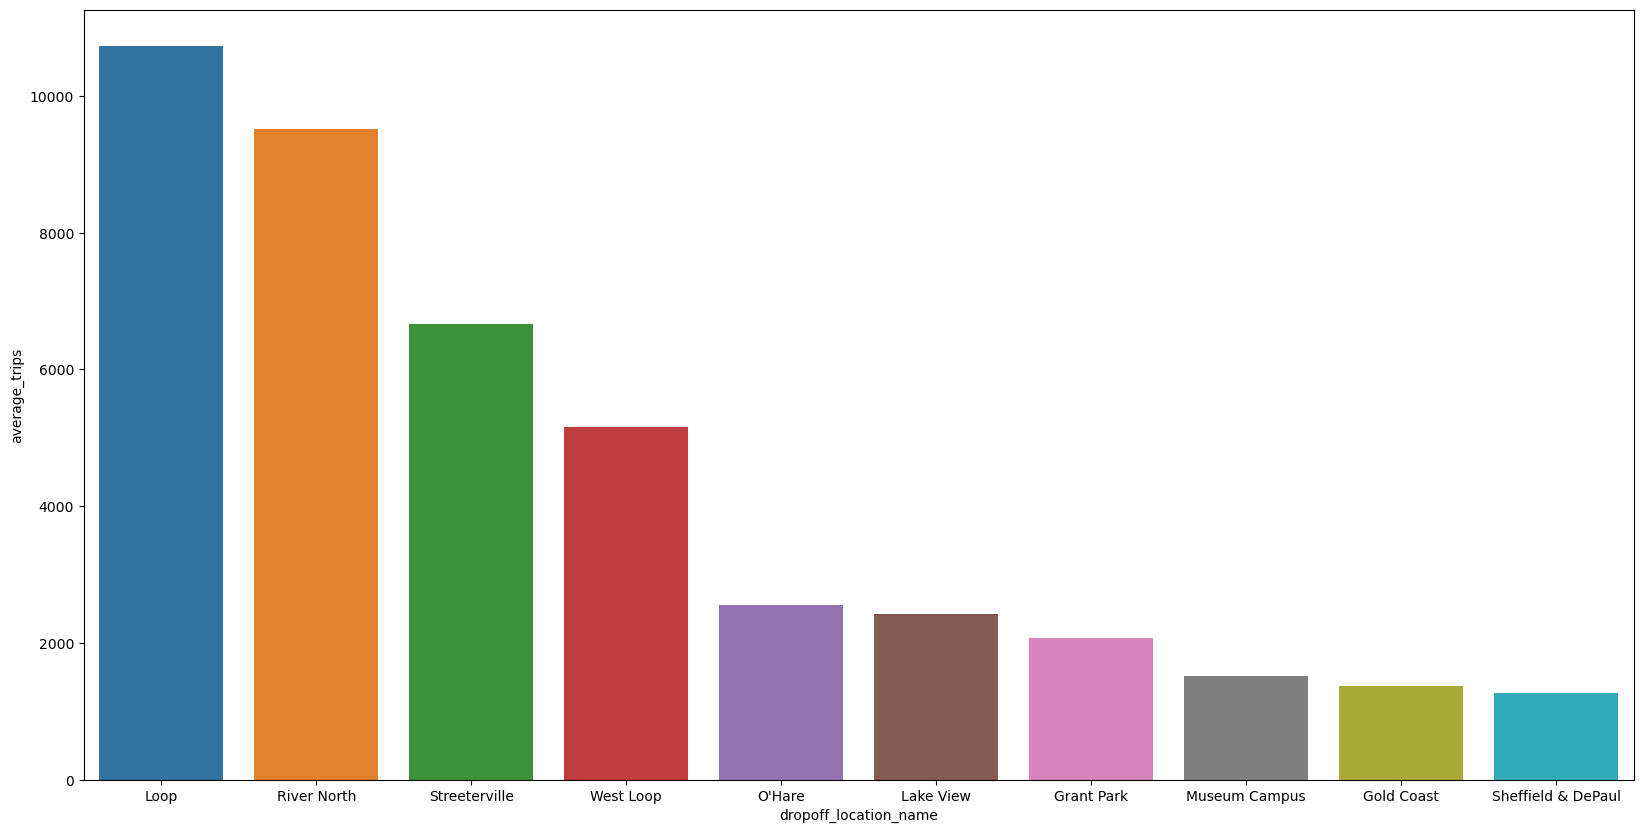

In [41]:
#mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
top_10_destination = data2.sort_values(by='average_trips',ascending=False).head(10)

plt.figure(figsize=(20,10))
sns.barplot(data=top_10_destination,x='dropoff_location_name',y='average_trips')

<AxesSubplot:xlabel='trips_amount', ylabel='company_name'>

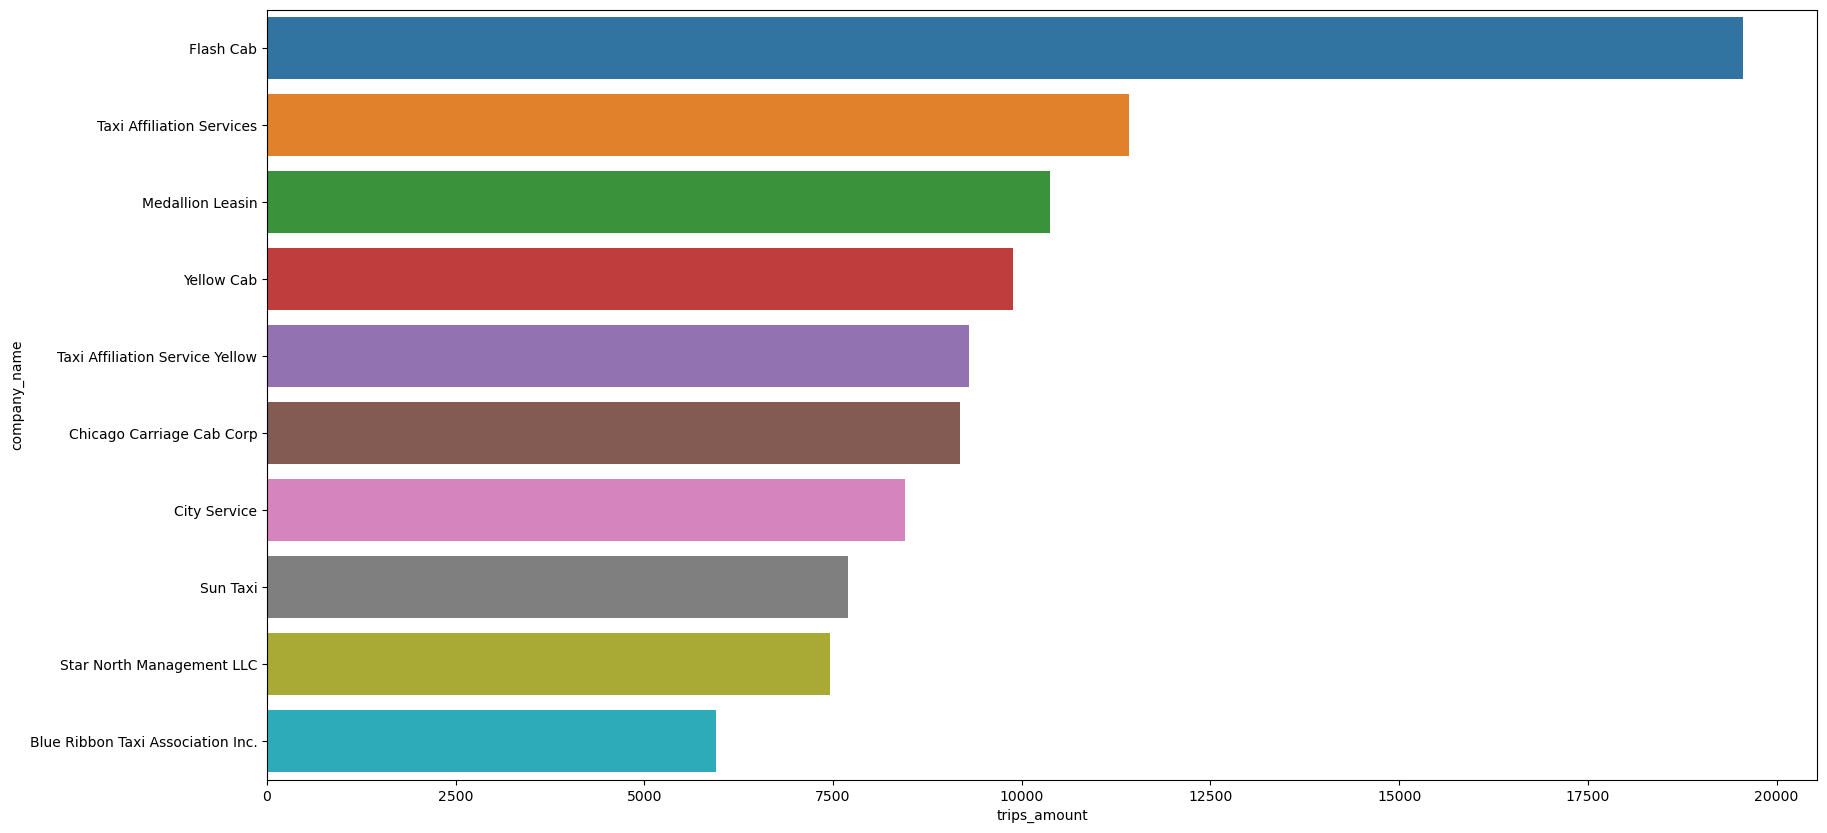

In [55]:
#membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
top_wil = data1.sort_values(by='trips_amount',ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(data=top_wil,x='trips_amount',y='company_name')

H0 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari-hari Sabtu yang hujan.
H1 : Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berbeda pada hari-hari Sabtu yang hujan.

In [59]:

good_condition = data3[data3['weather_conditions']=='Good']
bad_condition = data3[data3['weather_conditions']=='Bad']
good_condition

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [63]:
alpha = 0.05
result = st.ttest_ind(good_condition['duration_seconds'],bad_condition['duration_seconds'],equal_var=False)
pvalue = result.pvalue

if pvalue < alpha:
    print("tidak dapat mengabaikan h0, Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari-hari Sabtu yang hujan.")
else:
    print('dapat mengabaikan H0')

tidak dapat mengabaikan h0, Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari-hari Sabtu yang hujan.
